# Análise Exploratória dos Dados

Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Compreensão Geral da Base

Carregamento da base de dados

In [2]:
df = pd.read_csv("./dataset.csv")

In [3]:
df.shape

(4269, 13)

A base de dados possui 4269 registros e 13 colunas. Trata-se de uma base de pequenas dimensões

In [5]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


Analisando visualmente as primeiras e últimas linhas da base, é possível tirar algumas conclusões:

- A coluna loan_id não tem relevância para o projeto e pode ser eliminada
- Algumas colunas podem ter nomes melhor descrevam o dado armazenado
- As colunas de valores monetários estão em moeda indiana. Podemos diminuir a ordem de grandeza dos valores para facilitar a compreensão e simular uma moeda mais comum para nós
- O cibil_score é uma métrica de score de crédito usada na Índia. Podemos mudar o nome desse atributo e considerar que ele representa um score de crédito genérico

Abaixo, obtemos um resumo estatístico dos dados, como média, desvio-padrão, máximos e mínimos etc.

In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Através do quadro de informações acima, podemos observar que a base não apresenta nenhum dado nulo ou faltante. Um problema encontrado é o fato de os valores monetários estarem representados com um tipo de dado de números inteiros. Pode ser feita uma conversão para um tipo mais adequado, que considere as casas decimais. Além disso, todas as colunas exceto loan_id possuem um caractere de espaço antes do nome, o que pode causar confusão.

## Análise de Consistência e Integridade

Como já visto na etapa anterior, a base não possui dados faltantes

In [9]:
duplicatas = df.duplicated().sum()
duplicatas_id = df.duplicated(subset=df.columns.difference(['loan_id'])).sum()
print(duplicatas)
print(duplicatas_id)

0
0


Com o código acima, podemos confirmar que a base de dados não possui duplicatas, mesmo desconsiderando o identificador único de cada empréstimo

In [10]:
variaveis_categoricas = [' education', ' self_employed', ' loan_status']

for coluna in variaveis_categoricas:
    print(f"Valores únicos na coluna '{coluna}': {df[coluna].unique()}")

Valores únicos na coluna ' education': [' Graduate' ' Not Graduate']
Valores únicos na coluna ' self_employed': [' No' ' Yes']
Valores únicos na coluna ' loan_status': [' Approved' ' Rejected']


Acima, podemos ver os valores únicos de cada coluna categórica da base de dados. Basicamente, são classificações binárias que poderão ser facilmente transformadas em representações numéricas no futuro. Observa-se que também há um caractere de espaço em branco antes de cada classificação

## Distribuições e Relações Entre os Dados

In [11]:
variaveis_numericas = [' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', \
                       ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', \
                        ' bank_asset_value']

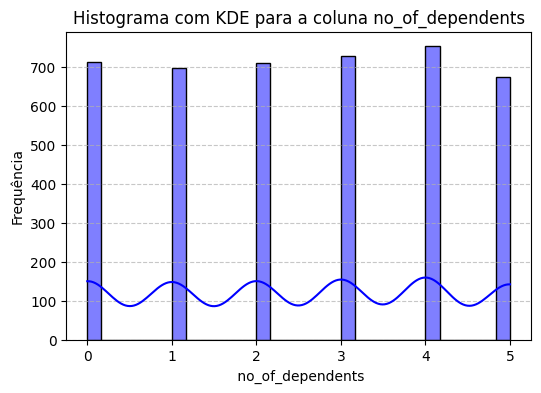

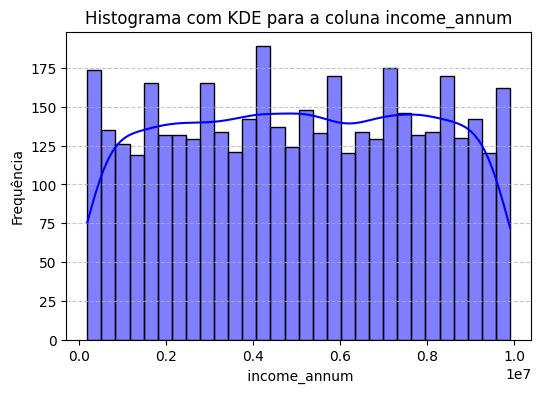

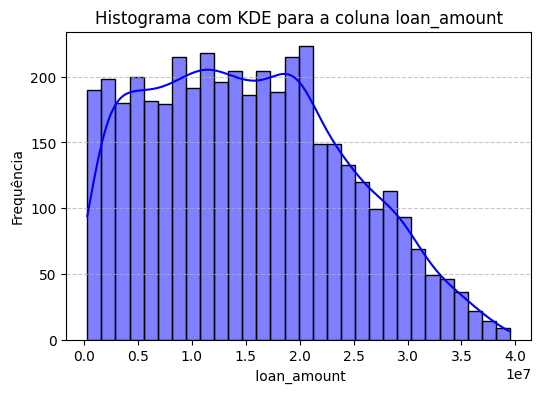

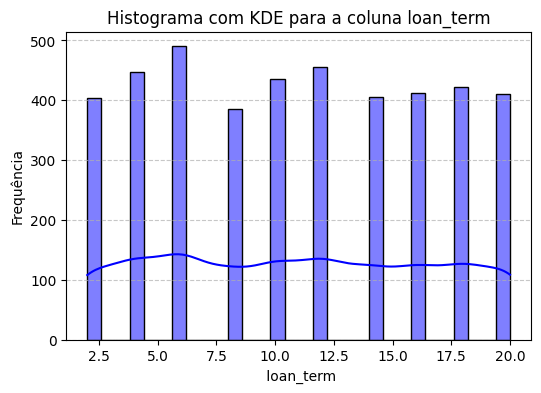

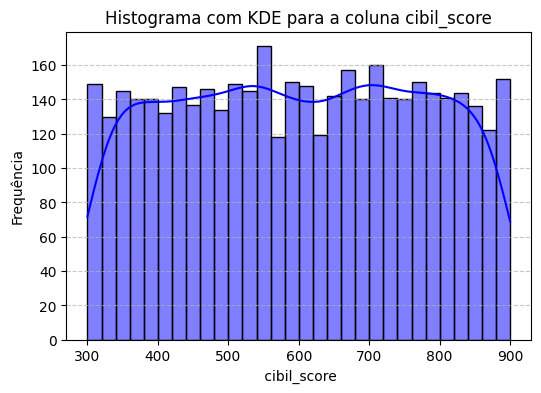

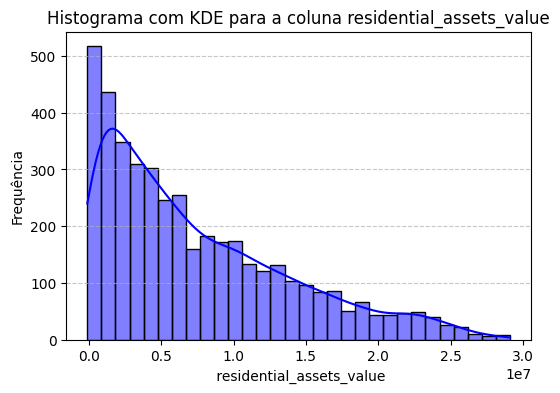

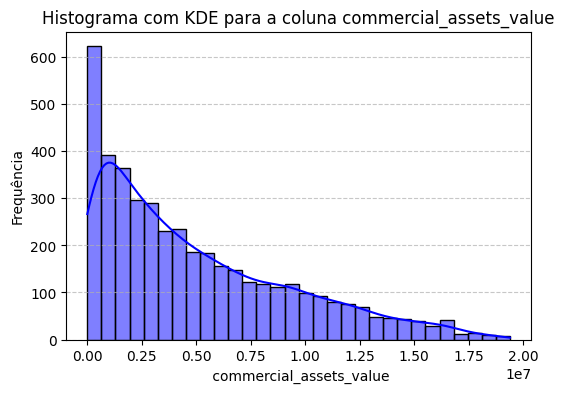

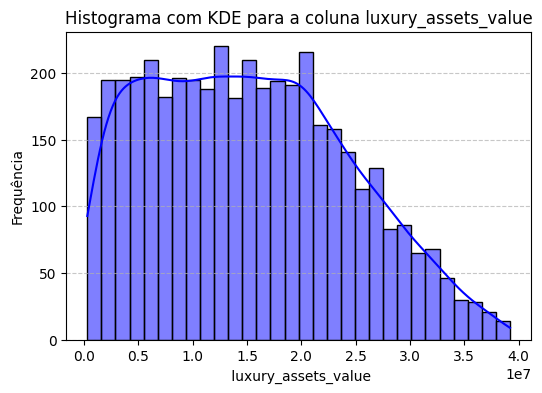

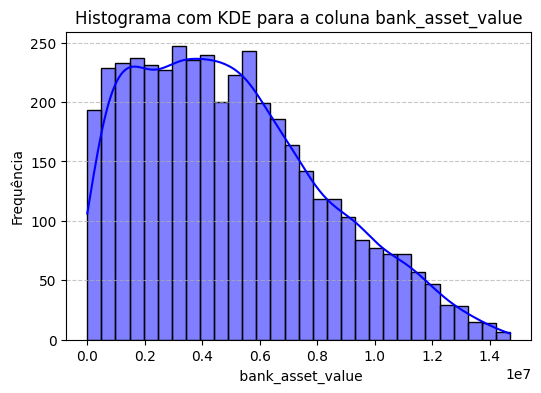

In [12]:
for coluna in variaveis_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[coluna], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f"Histograma com KDE para a coluna{coluna}")
    plt.xlabel(coluna)
    plt.ylabel("Frequência")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout
    plt.show()

Analisando as distribuições das variáveis numéricas da base, podemos concluir que algumas colunas possuem distribuições bem assimétricas, porém assimetria já é esperada dada a natureza dos dados. A quantidade de clientes com poucos ativos financeiros é maior, ao mesmo tempo em que a ocorrência de empréstimos de pequenas e médias quantias é mais comum

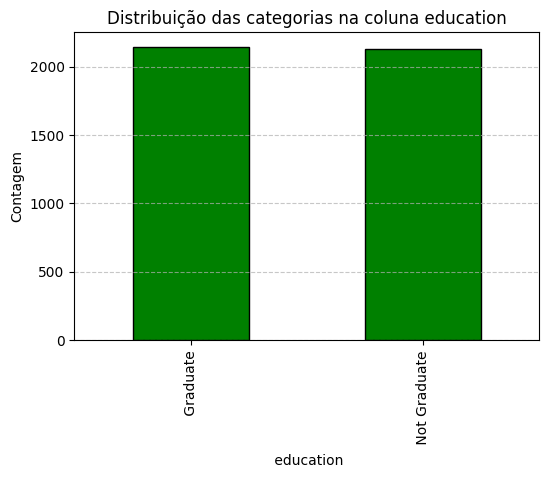

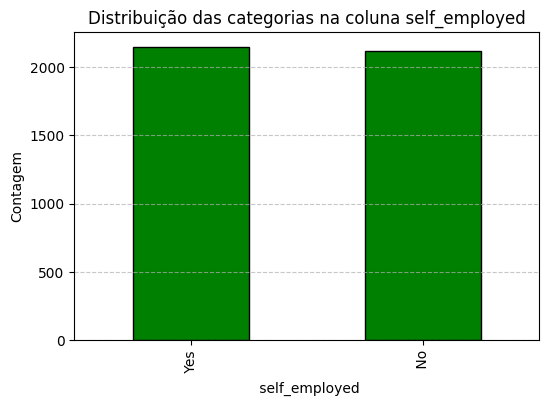

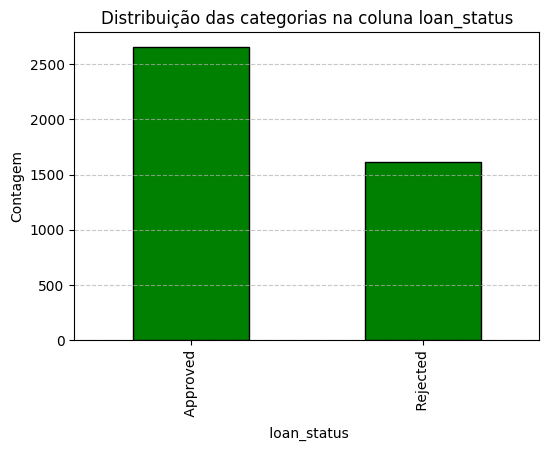

In [13]:
for coluna in variaveis_categoricas:
    plt.figure(figsize=(6, 4))
    df[coluna].value_counts().plot(kind='bar', color='green', edgecolor='black')
    plt.title(f"Distribuição das categorias na coluna{coluna}")
    plt.xlabel(coluna)
    plt.ylabel("Contagem")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout
    plt.show()

Por meio da visualização da distribuição das colunas categóricas da base de dados, nota-se um desbalanceamento na coluna loan_status, que pode prejudicar a realização do treinamento do modelo de machine learning no futuro.

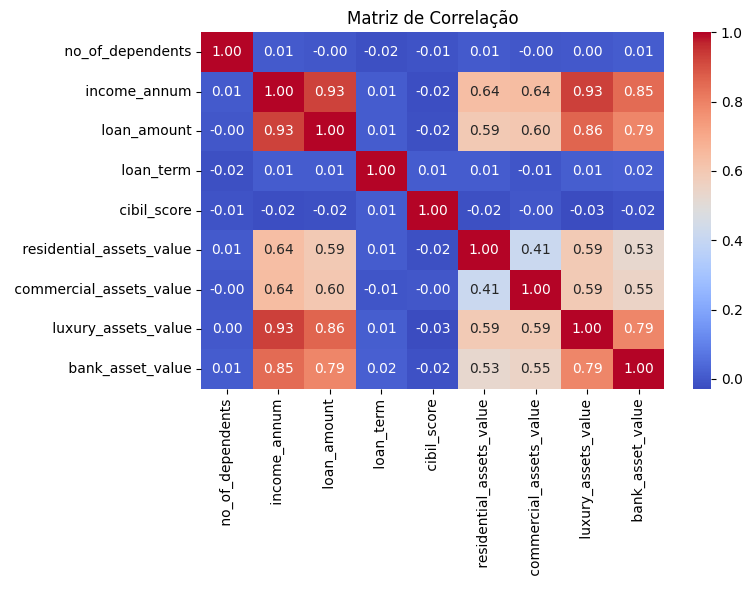

In [14]:
matriz_correlacao = df[variaveis_numericas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

Analisando a matriz de correlação entre as variáveis numéricas da base, podemos observar correlações fortes que já são esperadas, como a forte correlação entre a renda anual e a quantia do empréstimo ou a soma de ativos financeiros e a quantia do empréstimo

In [15]:
for i, col1 in enumerate(variaveis_categoricas):
    for col2 in variaveis_categoricas[i+1:]:
        tabela_contingencia = pd.crosstab(df[col1], df[col2])
        print(f"Tabela de Contingência entre{col1} e{col2}")
        print(tabela_contingencia)
        print('\n')

Tabela de Contingência entre education e self_employed
 self_employed    No   Yes
 education                
Graduate        1089  1055
Not Graduate    1030  1095


Tabela de Contingência entre education e loan_status
 loan_status  Approved  Rejected
 education                      
Graduate          1339       805
Not Graduate      1317       808


Tabela de Contingência entre self_employed e loan_status
 loan_status    Approved  Rejected
 self_employed                    
No                  1318       801
Yes                 1338       812




Por meio das tabelas de contingência acima, podemos ver que as quantidades de cada ocorrência são equilibradas em todas as tabelas e não há indícios de que a educação ou o fato de ser autônomo, por si só, modficam as chances de o empréstimo ser concedido

Quantidade de outliers na coluna no_of_dependents: 0
Porcentagem de outliers em relação à base completa: 0.00%


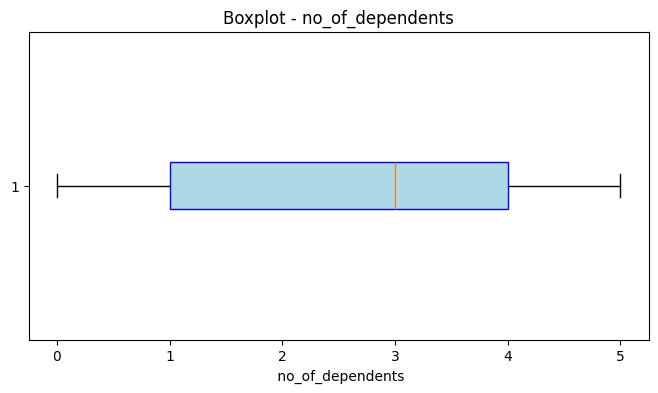

Quantidade de outliers na coluna income_annum: 0
Porcentagem de outliers em relação à base completa: 0.00%


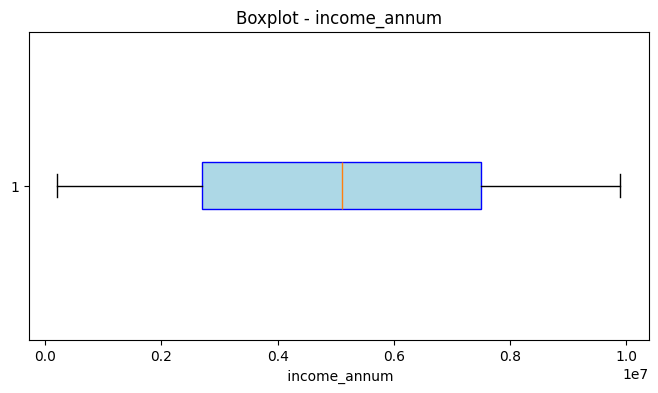

Quantidade de outliers na coluna loan_amount: 0
Porcentagem de outliers em relação à base completa: 0.00%


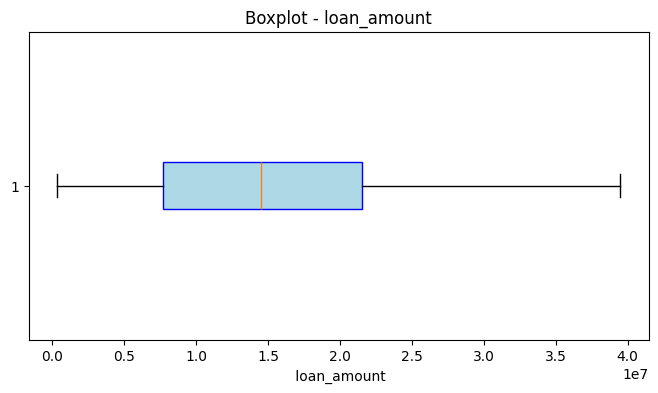

Quantidade de outliers na coluna loan_term: 0
Porcentagem de outliers em relação à base completa: 0.00%


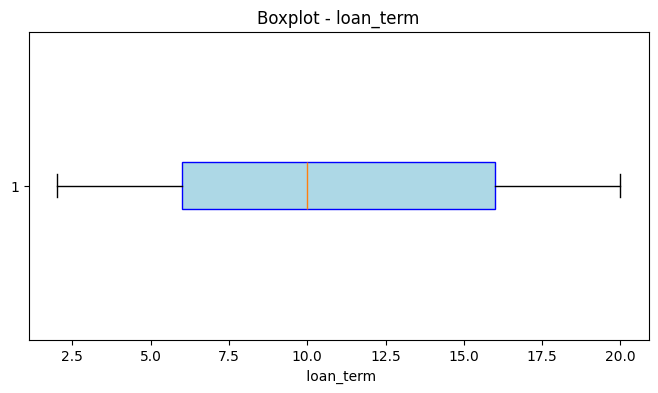

Quantidade de outliers na coluna cibil_score: 0
Porcentagem de outliers em relação à base completa: 0.00%


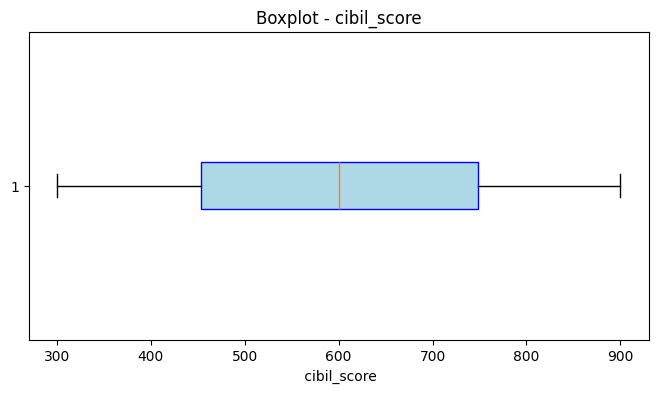

Quantidade de outliers na coluna residential_assets_value: 52
Porcentagem de outliers em relação à base completa: 1.22%


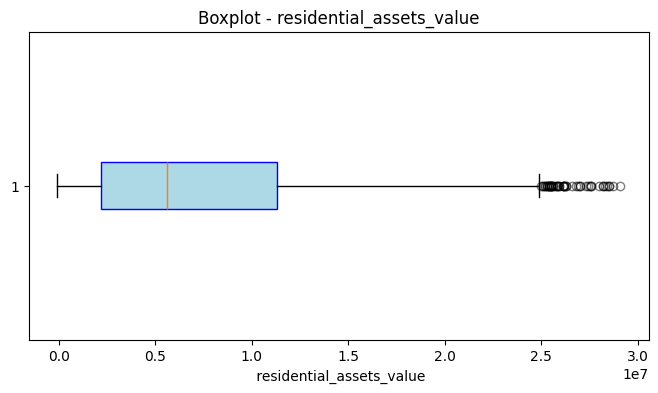

Quantidade de outliers na coluna commercial_assets_value: 37
Porcentagem de outliers em relação à base completa: 0.87%


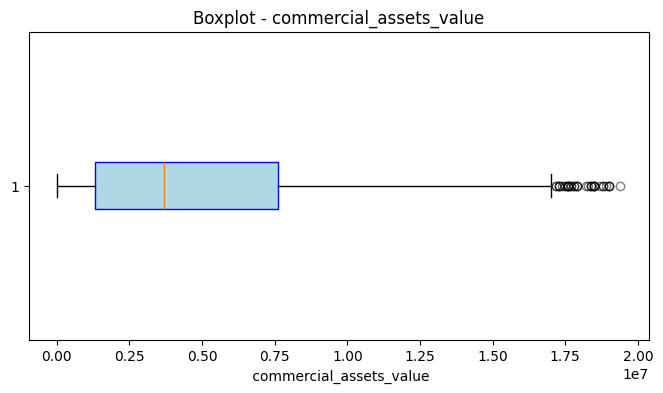

Quantidade de outliers na coluna luxury_assets_value: 0
Porcentagem de outliers em relação à base completa: 0.00%


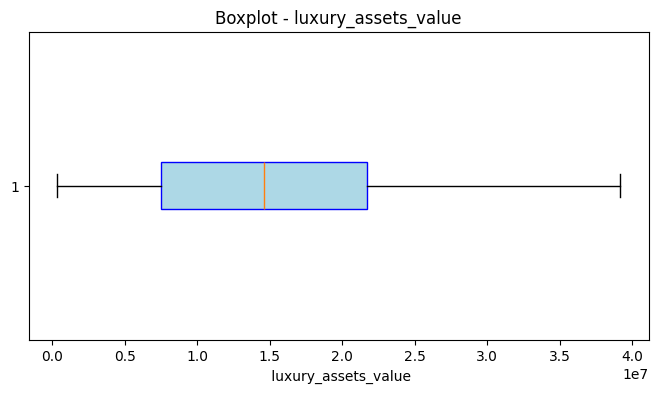

Quantidade de outliers na coluna bank_asset_value: 5
Porcentagem de outliers em relação à base completa: 0.12%


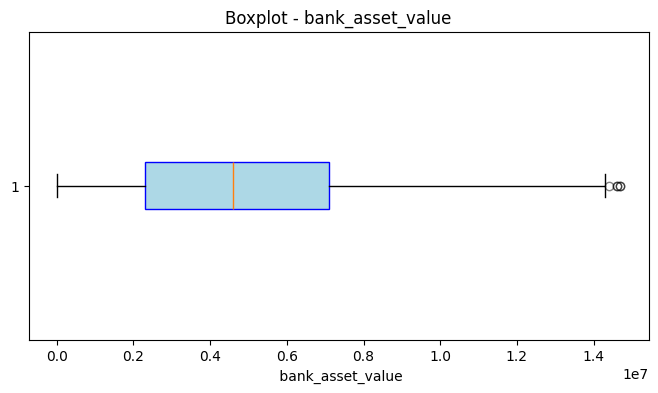

In [16]:
for coluna in variaveis_numericas:
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1

    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    
    quantidade_outliers = outliers[coluna].count()
    porcentagem_outliers = (quantidade_outliers / len(df)) * 100

    print(f"Quantidade de outliers na coluna{coluna}: {quantidade_outliers}")
    print(f"Porcentagem de outliers em relação à base completa: {porcentagem_outliers:.2f}%")

    plt.figure(figsize=(8, 4))
    plt.boxplot(df[coluna], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), \
                flierprops=dict(marker='o', color='red', alpha=0.5))
    plt.title(f"Boxplot -{coluna}")
    plt.xlabel(coluna)
    plt.show()

Com a análise de outliers realizada acima, podemos concluir que 3 das colunas numéricas da base possuem outliers, e que sua porcentagem em relação à base completa é pequena, o que indica que é possível eliminar os registros com outliers em vez de buscar técnicas de tratamento